# Assignment 5 - Simple Linear Regression

In this assignment, we will learn how to perform simple linear regression for a prediction task on a real dataset. We will do so using the theoretical results derived in class, and also with the `sklearn` package.

# Foundational Mathematics for AI

## Exercise 1: Defining a function to compute OLS (Ordinary Least Square) estimators for simple linear regression

**YOUR TURN**

Suppose we are given a set of data points $(x_1, y_1), \dots, (x_n, y_n)$ where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$ for all $i=1,\dots,n$.

Our goal is to perform linear regression with this data.

(a) Define a function called ``get_ols_estimators`` which takes arrays $X = [x_1,\dots,x_n]$ and $Y=[y_1,\dots,y_n]$ as input, and returns the values of the intercept $\beta_0$ and slope coefficient $\beta_1$ for the line of best fit for the data.

*Note*: These are given in formulas (3) and (4) in the lecture notes.

(b) Test that your function is giving the right answer by validating its output on the toy dataset $(x_1, y_1), (x_2,y_2), (x_3, y_3) = (1,2), (2,5), (3,6)$.

In [1]:
import numpy as np

def get_ols_estimators(X, Y):
  n = len(X)
  x_mean = np.mean(X)
  y_mean = np.mean(Y)

  numerator = np.sum((X - x_mean) * (Y - y_mean))
  denominator = np.sum((X - x_mean)**2)

  beta_1 = numerator / denominator
  beta_0 = y_mean - beta_1 * x_mean

  return beta_0, beta_1

In [2]:
X_toy = np.array([1, 2, 3])
Y_toy = np.array([2, 5, 6])

beta_0_toy, beta_1_toy = get_ols_estimators(X_toy, Y_toy)

print(f"Estimated beta_0: {beta_0_toy:.3f}")
print(f"Estimated beta_1: {beta_1_toy:.3f}")

Estimated beta_0: 0.333
Estimated beta_1: 2.000


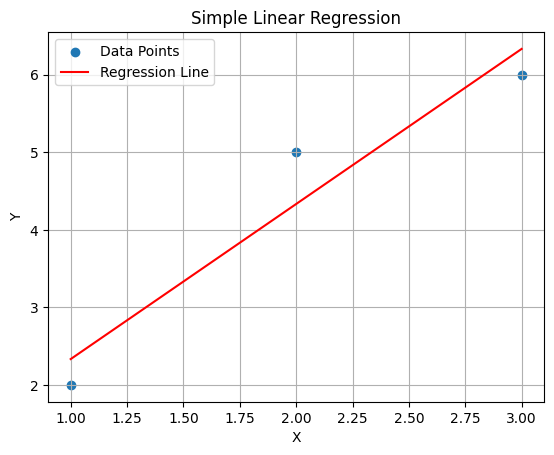

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_toy, Y_toy, label='Data Points')

x_vals = np.linspace(X_toy.min(), X_toy.max(), 100)
y_vals = beta_0_toy + beta_1_toy * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

It looks like the line of best fit

## Exercise 2: House price prediction with simple linear regression

**YOUR TURN**

(a) Load the `housing.csv` dataset, which contains data about the price and lotsize of houses.

(b) Suppose we model the relationship between house price $y$ and lotsize $x$ using the linear model
$$
y = \beta_0 + \beta_1 x.
$$

Use your previously defined ``get_ols_estimators`` function to estimate $\hat{\beta_0}$ and $\hat{\beta_1}$.

(c) Comment on the meaning of your answers in (b). In particular, what do the values of $\hat{\beta_0}$ and $\hat{\beta_1}$ mean in the context of your model for house prices? Do your estimates make sense? Why or why not?

(d) Create a scatter plot of lotsize and house prices, and overlay your line of best fit on this plot.

(e) Compute the residuals $y_i - \hat{y_i}$ for all $i=1,\dots,n$, where $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$ denote the predicted values from your line of best fit. Plot a histogram of these residuals. What distribution do they follow?

(f) Using your model, predict:

*   (i) The price of a 100,000 sq.ft house.
*   (ii) How big you expect a house costing USD 10,000,000 to be.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

filepath = '/content/drive/MyDrive/M4AI/housing.csv'
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
beta0, beta1 = get_ols_estimators(df['lotsize'], df['price'])

print(f"Estimated beta_0: {beta0:.3f}")
print(f"Estimated beta_1: {beta1:.3f}")

Estimated beta_0: 34136.192
Estimated beta_1: 6.599


### Interpretation of $\hat {\beta_0}$ and $\hat{\beta_1}$ for the housing price model

$\hat{\beta_0}$ represents the estimated price of a house with a lotsize of 0 square feet.

In this context, a lotsize of 0 is not meaningful for a house. Therefore, the interpretation of $\hat{\beta_0}$ as the price of a house with no land might not be directly applicable. It can be thought of as the intercept on the price axis, but its practical meaning.

$\hat{\beta_1}$ represents the estimated change in house price for a one-unit(one square foot) increase in lotsize. A $\hat{\beta_1}$ value of approximately 6.55 indicates that for every additional square foot of lotsize, the estimated house price increases by roughly $6.55.

This estimate makes sense in the context of house prices, as larger lotsizes generally correspond to higher house prices. The positive
value aligns with this expectation. The magnitude of the value ($6.55) seems reasonable for the price increase per square foot of land.

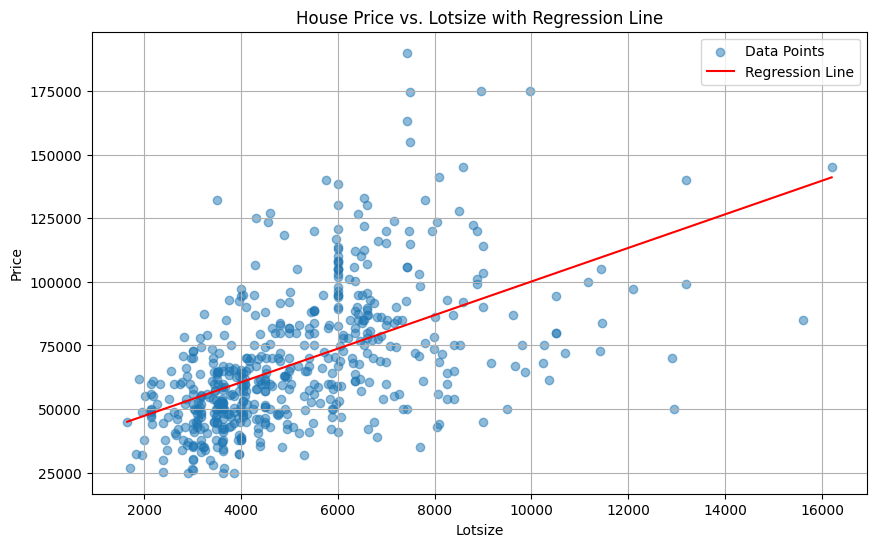

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lotsize'], df['price'], alpha=0.5, label='Data Points')

x_vals = np.linspace(min(df['lotsize']), max(df['lotsize']), 100)
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('House Price vs. Lotsize with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

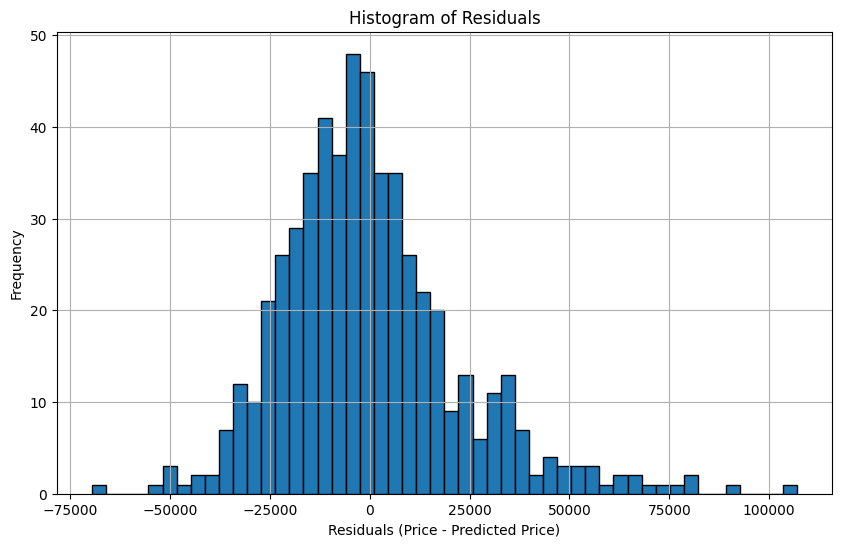

In [8]:
y_pred = beta0 + beta1 * df['lotsize']

residuals = df['price'] - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residuals (Price - Predicted Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

The histogram of residuals appears to follow a roughly normal distribution centered around zero. However, there is some skew to the right, which means that the model tends to underestimate prices for some houses.


In [15]:
lotsize_i = 100000
predicted_price_i = beta0 + beta1 * lotsize_i
print(f"Predicted price of a 100,000 square foot house: ${predicted_price_i:,.3f}")

price_i = 10000000
predicted_lotsize_i = (price_i - beta0) / beta1
print(f"Expected lotsize of a house costing $10,000,000: {predicted_lotsize_i:,.3f} square foot")

Predicted price of a 100,000 square foot house: $694,012.950
Expected lotsize of a house costing $10,000,000: 1,510,261.374 square foot


## Exercise 3: Leveraging SKLearn to perform simple linear regression.

**Task:** By looking at the documentation for sklearn.linear_model.LinearRegression, learn how to:

*   Create a LinearRegression() object/model
*   Fit the model to the training data. *Note*: You may need to reshape the data to column arrays by using  column.reshape(-1,1)
*   Obtain the OLS estimators

(a) Load the `salary_data.csv` file, and use sklearn to perform simple linear regression between salary $y$ and age $x$ using the linear model
$$
y = \beta_0 + \beta_1 x.
$$

**Note**: This simply means that you should do what you did in parts (b), (c), (d) and (e) of Exercise 2.

(b) Use your model to predict what salary you would be earning if you were actually working right now! This might be the only time in your life you wished you were older! 😂



In [10]:
filepath = '/content/drive/MyDrive/M4AI/salary_data.csv'
df = pd.read_csv(filepath)
df.head()

,EmpNum,EducLev,JobGrade,YrsExper,Age,Gender,YrsPrior,AnltcsExp,Salary,Unnamed: 9
0,14933,3,1,3,26,0,1,0,37000,NaN
1,17187,1,1,14,38,1,1,0,44100,NaN
2,10702,1,1,12,35,1,0,0,38200,NaN
3,13140,2,1,8,40,1,7,0,35600,NaN
4,17628,3,1,3,28,0,0,0,34000,NaN


In [11]:
from sklearn.linear_model import LinearRegression

X_salary = df['Age'].values.reshape(-1, 1)
Y_salary = df['Salary'].values

model = LinearRegression()
model.fit(X_salary, Y_salary)

beta0_sklearn = model.intercept_
beta1_sklearn = model.coef_[0]

print(f"Estimated beta_0 (sklearn): {beta0_sklearn:.3f}")
print(f"Estimated beta_1 (sklearn): {beta1_sklearn:.3f}")


Estimated beta_0 (sklearn): 28967.767
Estimated beta_1 (sklearn): 612.767


### Interpretation
$\hat{\beta_0}$ represents the estimated salary for someone with an age of 0.

Similar to the house price example, an age of 0 is not practically relevant for the context of earning a salary. It's the intercept of the regression line on the salary axis.

$\hat{\beta_1}$ represents the estimated increase in salary for each additional year of age.

The positive value indicates that as age increases, the salary is expected to increase, which meets the general trend as experience often leads to higher salaries.

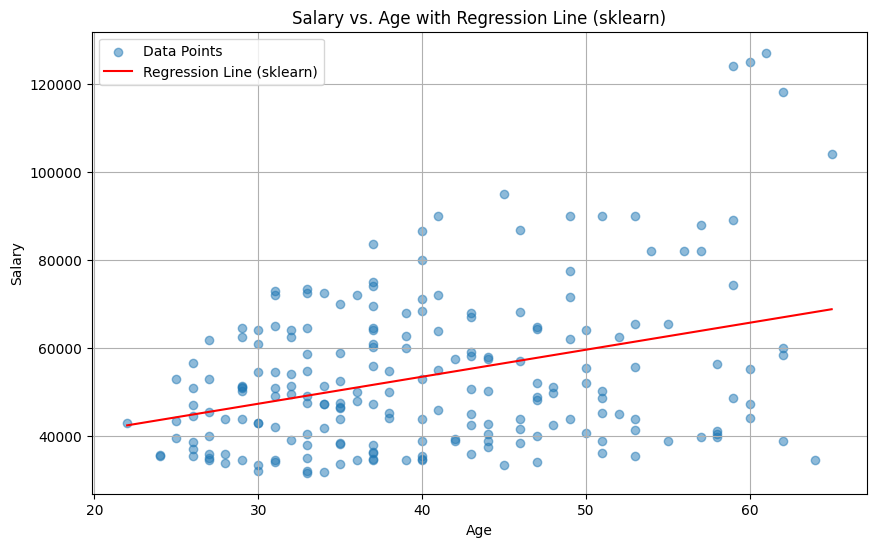

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5, label='Data Points')

x_vals_salary = np.linspace(min(df['Age']), max(df['Age']), 100).reshape(-1, 1)
y_vals_salary = model.predict(x_vals_salary)
plt.plot(x_vals_salary, y_vals_salary, color='red', label='Regression Line (sklearn)')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary vs. Age with Regression Line (sklearn)')
plt.legend()
plt.grid(True)
plt.show()

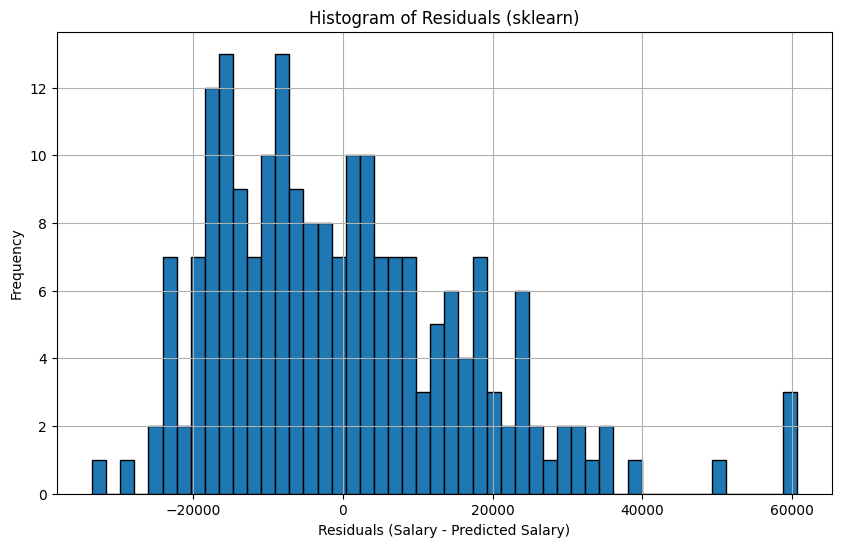

In [13]:
y_pred_sklearn = model.predict(X_salary)
residuals_sklearn = Y_salary - y_pred_sklearn

plt.figure(figsize=(10, 6))
plt.hist(residuals_sklearn, bins=50, edgecolor='black')
plt.xlabel('Residuals (Salary - Predicted Salary)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (sklearn)')
plt.grid(True)
plt.show()


The histogram of residuals for the salary data also appears to be roughly normally distributed and centered slightly to the left of zero. However, there is some skew to the right just like the housing dataset, which means that the model tends to underestimate salaries for some people. Also, there are 3 data points with significant residuals of around 60000.

In [14]:
my_age = 17
my_age_reshaped = np.array([[my_age]])
predicted_my_salary = model.predict(my_age_reshaped)[0]

print(f"If I am working, my predicted salary would be: ${predicted_my_salary:,.3f}")

If I am working, my predicted salary would be: $39,384.798
